In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)


#import libraries

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Air quality prediction/air-quality-observations.csv'

df=pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
display(df.head())

,device_id,date_time,location_description,latitude,longitude,pm1,pm25,pm10,ozone,nitrogen_dioxide,carbon_monoxide,air_quality_category,point
0,ems-b879,2023-01-17T00:26:09+00:00,Fairyland,-37.546758,143.823172,3,3,4,70,97,-1006,Fair,"-37.546758, 143.823172"
1,ems-b879,2023-01-17T02:41:07+00:00,Fairyland,-37.546758,143.823172,2,2,2,75,104,218,Fair,"-37.546758, 143.823172"
2,ems-b879,2023-01-17T03:26:07+00:00,Fairyland,-37.546758,143.823172,2,2,2,61,104,743,Fair,"-37.546758, 143.823172"
3,ems-b879,2023-01-15T05:11:27+00:00,Fairyland,-37.546758,143.823172,0,0,0,70,119,-2143,Fair,"-37.546758, 143.823172"
4,ems-b879,2022-12-23T19:45:10+00:00,Fairyland,-37.546758,143.823172,3,4,4,65,119,-4766,Fair,"-37.546758, 143.823172"


In [ ]:
# Convert to datetime
df["date_time"] = pd.to_datetime(df["date_time"])

In [ ]:
df.dtypes

,0
device_id,object
date_time,"datetime64[ns, UTC]"
location_description,object
latitude,float64
longitude,float64
pm1,int64
pm25,int64
pm10,int64
ozone,int64
nitrogen_dioxide,int64


# dimension reduction

Explained variance ratio by the 3 components: [0.47562471 0.36219755 0.12424125]
Total variance explained by the 3 components: 0.9621 (96.21%)


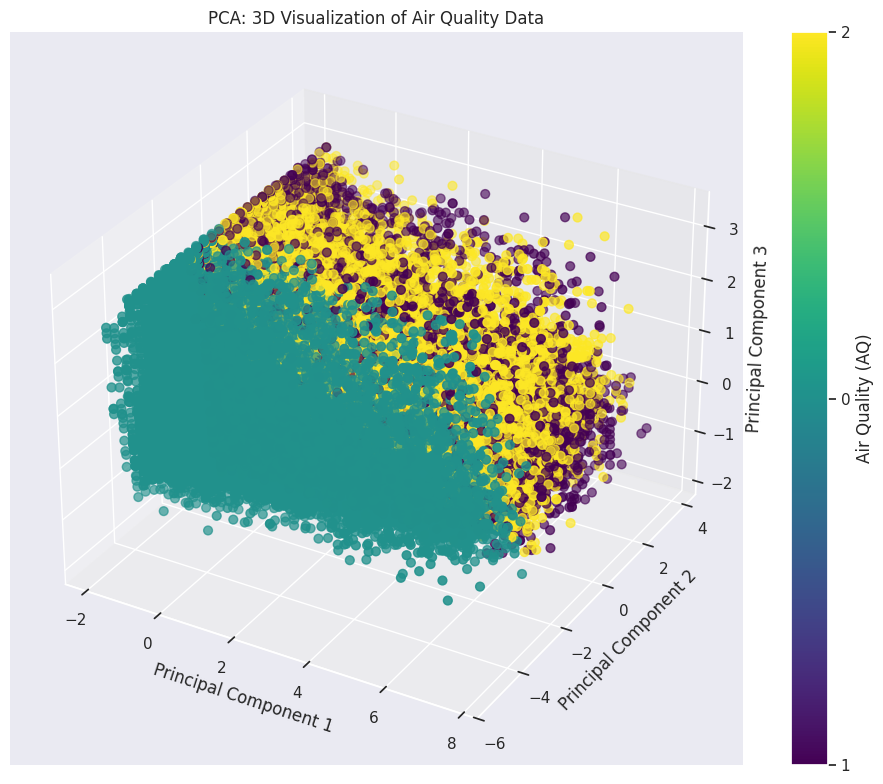

Newly created DataFrame with Time, PCA components, and AQ:
                       Time    PC1_3d    PC2_3d    PC3_3d  AQ
0 2023-01-15 05:11:27+00:00 -1.295210  2.818385  3.070431   1
1 2022-12-23 19:45:10+00:00  3.351908  2.341241  0.091409   1
2 2022-12-23 20:30:10+00:00  4.277607  0.887461  0.334434   1
3 2022-12-23 21:30:09+00:00 -0.182888 -0.211758  0.881796   1
4 2022-12-23 22:00:10+00:00  1.296838  2.193056  0.752165   1

Data types of the new DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89700 entries, 0 to 89699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Time    89700 non-null  datetime64[ns, UTC]
 1   PC1_3d  89700 non-null  float64            
 2   PC2_3d  89700 non-null  float64            
 3   PC3_3d  89700 non-null  float64            
 4   AQ      89700 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(1)
memory usage: 3.4 MB
None


In [ ]:
# Import necessary libraries

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# --- Step 1: Data Preparation and Scaling ---

# Select numerical columns to apply PCA on
numerical_columns = ['PM1', 'PM25', 'PM10', 'O3', 'NO2', 'CO', 'Avg_PM', 'Avg_O3_NO2']

# Standardize the numerical data before PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected[numerical_columns])

# --- Step 2: Apply PCA and Add Components to DataFrame ---

# Apply PCA to reduce the data to 3 components
pca_3d = PCA(n_components=3)
# IMPORTANT: Use the scaled data for PCA
pca_result_3d = pca_3d.fit_transform(df_scaled)

# Create a copy of the dataframe to store PCA results
df_pca = df_selected.copy()

# Add the 3 principal components to the new dataframe
df_pca['PC1_3d'] = pca_result_3d[:, 0]
df_pca['PC2_3d'] = pca_result_3d[:, 1]
df_pca['PC3_3d'] = pca_result_3d[:, 2]

# --- Step 3: Explained Variance Ratio ---

# Print the variance explained by each of the 3 components
print(f"Explained variance ratio by the 3 components: {pca_3d.explained_variance_ratio_}")
# Print the total variance explained by the 3 components
cumulative_variance = np.sum(pca_3d.explained_variance_ratio_)
print(f"Total variance explained by the 3 components: {cumulative_variance:.4f} ({cumulative_variance * 100:.2f}%)")

# --- Step 4: 3D Visualization ---

# Convert the 'AQ' column to numerical categories for coloring
# pd.factorize is a convenient way to get numeric codes and the original labels
aq_numeric, aq_labels = pd.factorize(df_pca['AQ'])

# Create a 3D scatter plot for the PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the 3D PCA result
scatter = ax.scatter(df_pca['PC1_3d'], df_pca['PC2_3d'], df_pca['PC3_3d'],
                     c=aq_numeric,
                     cmap='viridis',
                     s=40) # Adjust marker size

# Set labels for the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Title for the plot
plt.title('PCA: 3D Visualization of Air Quality Data')

# Add a color bar for the scatter plot
cbar = plt.colorbar(scatter, ticks=range(len(aq_labels)))
cbar.set_ticklabels(aq_labels)
cbar.set_label('Air Quality (AQ)')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/pca_3d_final.png')
plt.show()


# First, ensure your 'time' column is accessible.
# If 'time' is the index of your DataFrame, reset it to become a regular column.
if 'time' not in df_pca.columns:
    # This checks if a 'time' column exists. If not, it assumes it's the index.
    df_pca_reset = df_pca.reset_index()
else:
    # If 'time' is already a column, just use the DataFrame as is.
    df_pca_reset = df_pca

# Define the list of columns you want to keep
columns_to_select = ['Time', 'PC1_3d', 'PC2_3d', 'PC3_3d', 'AQ']

# Create the new DataFrame by selecting only these columns
# Using .copy() is important to avoid SettingWithCopyWarning later on
df_final_pca = df_pca_reset[columns_to_select].copy()

# --- Verification ---
print("Newly created DataFrame with Time, PCA components, and AQ:")
print(df_final_pca.head())
print("\nData types of the new DataFrame:")
print(df_final_pca.info())

In [ ]:
df_final_pca.to_csv("final_dataset.csv", index=False)
print("Final dataset saved to 'final_dataset.csv'")

Final dataset saved to 'final_dataset.csv'
